# Introduction to Data Science in Python
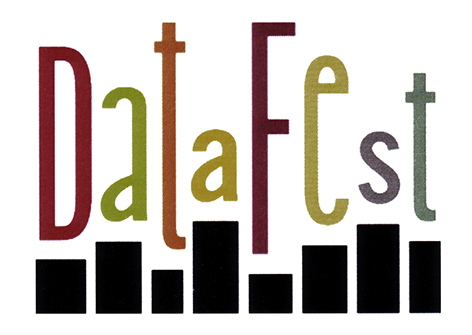

# Overview

- Basics of Python / Jupyter Notebooks
- Exploratory analysis using Pandas
- Building a Predictive Model with scikit-learn
- Usage of External Data

# Basics of Python / Jupyter Notebooks
- Started in 1989 by Guido van Rossum 
  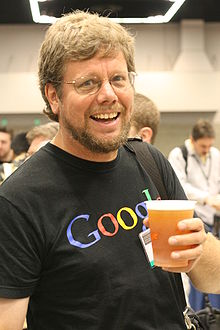
- The name is a tribute to the British comedy group Monty Python
- The Zen of Python
  - Beautiful is better than ugly.
  - Readability counts.
  - There should be one-- and preferably only one --obvious way to do it.

- More and more used in Data Science and Machine Learning (especially Deep Learning) 
    - 2052 participants
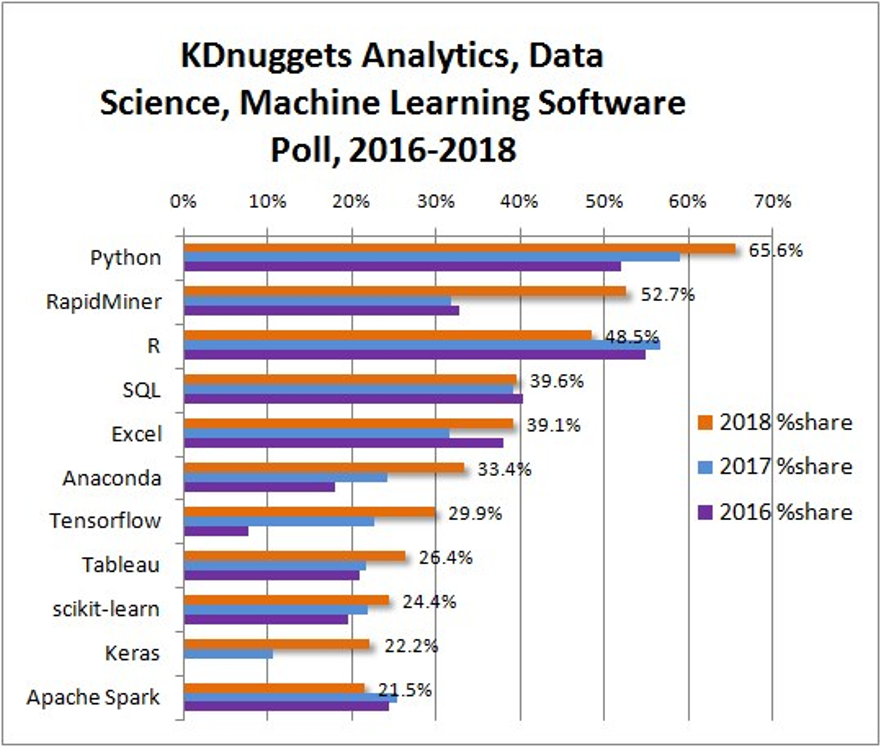

https://www.kdnuggets.com/2018/05/poll-tools-analytics-data-science-machine-learning-results.html


		
	


- Installation is done today mostly with Anaconda (Python Distribution)
  - https://www.anaconda.com/download/
  - Best use Python 3.\* branch and not 2.\* (branch continues but doesn't get new language features)
- Python can be used directly from the command line
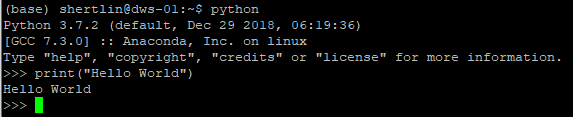

- For data analysis **jupyter notebooks** are used
  - Every notebook is composed of cells
    - either markdown cells (for documentation and structure)
    - or code cells
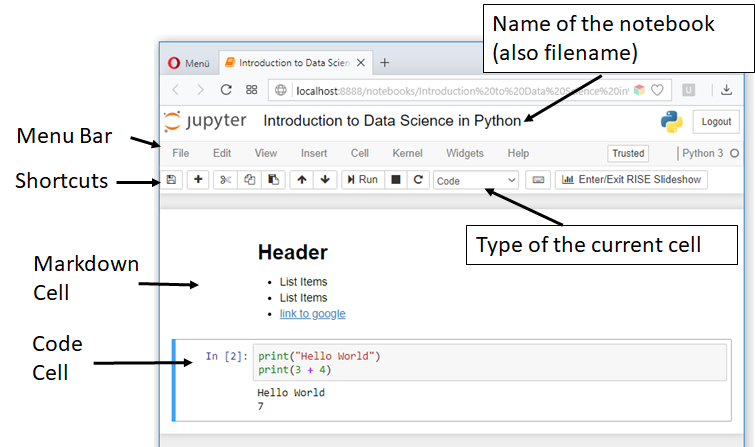

## Many helpful libraries available
- Visualization
    - Matplotlib
    - Seaborn
    - Bokeh / Plotly
- Web
    - library: requests 
    - information extraction: BeautifulSoup
    - crawling: Scrapy
- Scientific:
    - advance math functionalities: Numpy
    - algorithms and mathematical tools: SciPy
    - data exploration: Pandas

## Many helpful libraries available
- Natural Language Processing:
    - toolkit: NLTK
    - library: spaCy
    - topic modeling: gensim
- Machine Learning:
    - scikit learn
    - Keras
    - TensorFlow
    - PyTorch
- Image:
    - opencv

In [1]:
%%HTML
<style>
th,td {
  font-size: 18px
}
</style>

# Exploratory analysis using Pandas
- yet another animal which helps to analyse our data
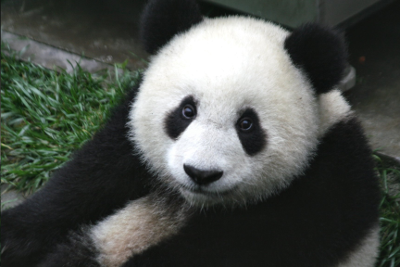
- contains DataFrame (similar to data frame in R) and Series (one dimensional data)
- first step: import pandas and load data
- probably most used (simple) dataset in machine learning: iris dataset
  - according to UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php)

In [2]:
import pandas as pd
iris = pd.read_csv("https://datahub.io/machine-learning/iris/r/iris.csv")

## Quick Data Exploration
- first have a look a the data

In [3]:
iris.head(10)

sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa

- sample some rows to get more diverse output

In [4]:
iris.sample(n=10, random_state=42)

sepallength  sepalwidth  petallength  petalwidth            class
73           6.1         2.8          4.7         1.2  Iris-versicolor
18           5.7         3.8          1.7         0.3      Iris-setosa
118          7.7         2.6          6.9         2.3   Iris-virginica
78           6.0         2.9          4.5         1.5  Iris-versicolor
76           6.8         2.8          4.8         1.4  Iris-versicolor
31           5.4         3.4          1.5         0.4      Iris-setosa
64           5.6         2.9          3.6         1.3  Iris-versicolor
141          6.9         3.1          5.1         2.3   Iris-virginica
68           6.2         2.2          4.5         1.5  Iris-versicolor
82           5.8         2.7          3.9         1.2  Iris-versicolor

- printing a summary of numerical fields

In [5]:
iris.describe()

sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

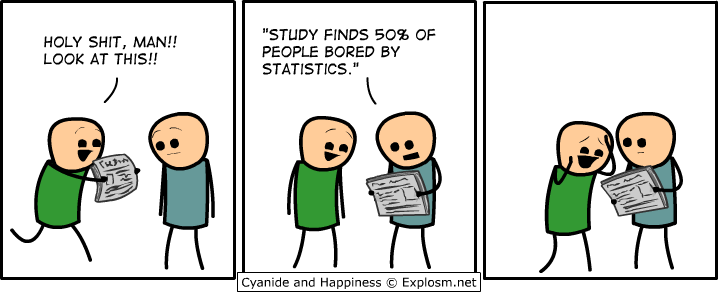
http://explosm.net/comics/2964/

- how many different classes do we have?
  - what is the frequency distribution of attribute *class*

In [6]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

- select data based on boolean condition

In [8]:
iris[iris.sepallength > 6.4].head()

sepallength  sepalwidth  petallength  petalwidth            class
50          7.0         3.2          4.7         1.4  Iris-versicolor
52          6.9         3.1          4.9         1.5  Iris-versicolor
54          6.5         2.8          4.6         1.5  Iris-versicolor
58          6.6         2.9          4.6         1.3  Iris-versicolor
65          6.7         3.1          4.4         1.4  Iris-versicolor

- visualization with seaborn

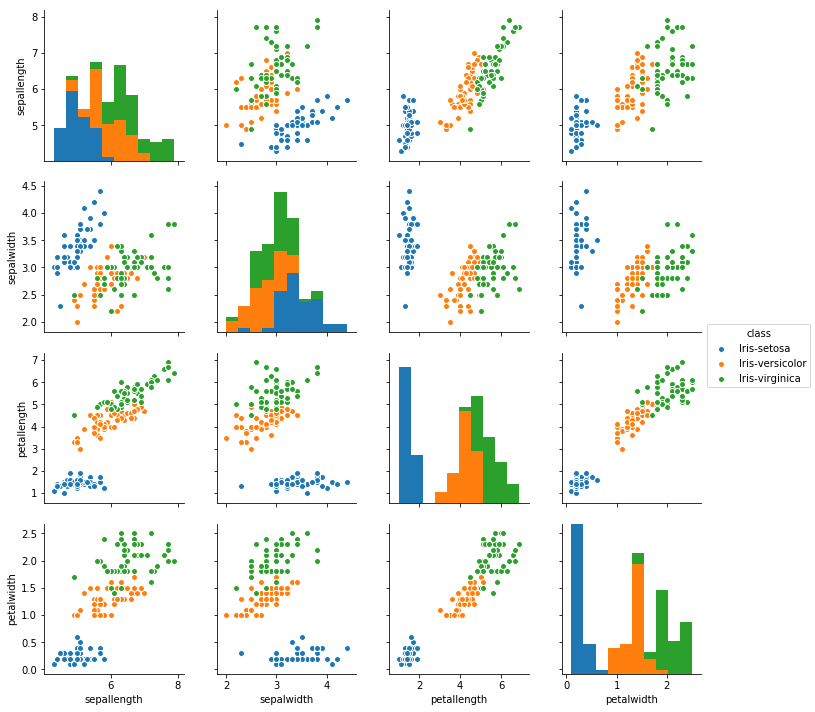

In [9]:
# with this command we do not have to call every time at the end of each cell "plt.show()"
%matplotlib inline 

# draw a scatter plot matrix with seaborn
import seaborn as sns
sns.pairplot(iris, hue="class")

- boxplot with pandas

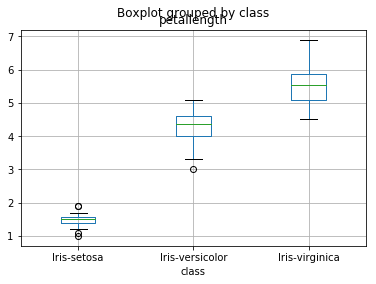

In [10]:
iris.boxplot(column='petallength', by = 'class')

## What is the dataset about?

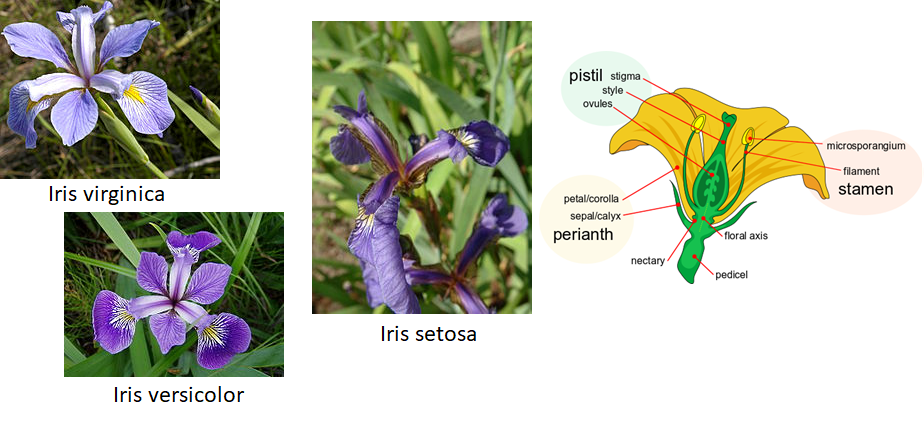

# Building a Predictive Model with scikit-learn

### Supervised Learning
 - you have input variables (*x*) and an output variable (*Y*)
 - classification if *Y* is categorical: "yes/no", "red/blue/green",...
 - regression if *Y* is real value: "weight"

### Reinforcement Learning
- software agents adapt their actions in an environment to maximize a reward
- only the state (e.g. of a game) has to be rated and **not** the actions

### Unsupervised Learning
- you **only** have input variables (*x*)
- Clustering, Subgroup discovery, Association Rule Discovery

# Supervised Learning with a Decision Tree
- choosing class/type of flower as our target variable
- prepare our dataset
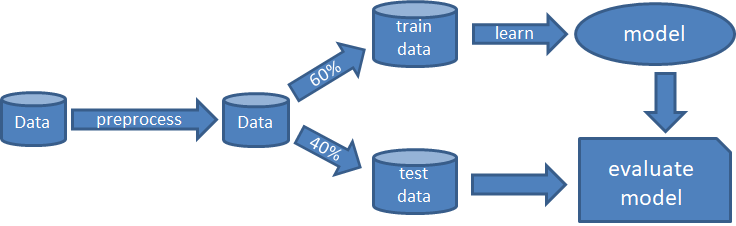

In [11]:
# split into data and target variables
iris_data = iris.drop('class', axis=1)
iris_target = iris['class']

# split into train and test set (for later model evaluation)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.4, random_state=42, stratify=iris_target)

display("Stratified train split")
display(y_train.value_counts())

display("Stratified test split")
display(y_test.value_counts())

'Stratified train split'

Iris-virginica     30
Iris-versicolor    30
Iris-setosa        30
Name: class, dtype: int64

'Stratified test split'

Iris-virginica     20
Iris-versicolor    20
Iris-setosa        20
Name: class, dtype: int64

## Learning a decison tree

In [12]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Have a look at the model

 - run the following two commands in console:
   - ```conda install -c conda-forge graphviz```
   - ```pip install graphviz``` (remember to install 'python-graphviz' on Windows 10!)

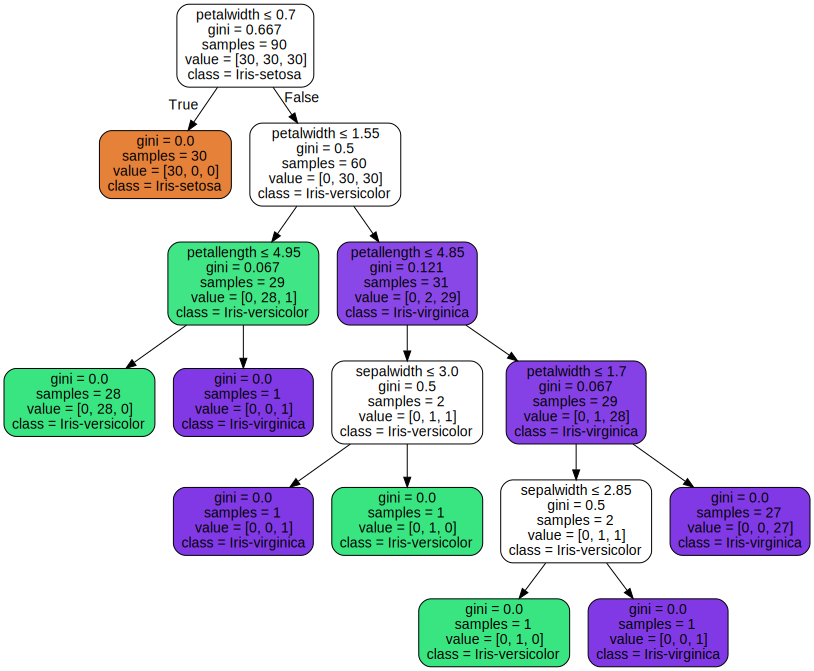

In [13]:
import graphviz 
from sklearn.utils.multiclass import unique_labels
dot_data = tree.export_graphviz(decision_tree,feature_names=X_train.columns,class_names=unique_labels(y_train), 
                                filled=True, rounded=True,special_characters=True,out_file=None)  
graphviz.Source(dot_data)

## Evaluate on the test set

In [14]:
y_pred = decision_tree.predict(X_test) # X_test = sepallength sepalwidth petallength petalwidth
print(list(y_pred[:5]))
print(list(y_test[:5]))

['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica']
['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica']


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

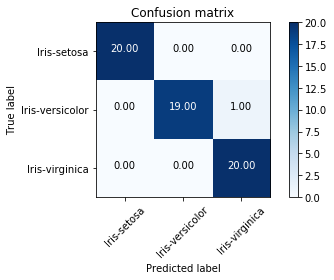

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, unique_labels(y_train))

# Usage of External Data 
- enrich dataset with external data
- many high quality datasets out there:

|Dataset| URL|
|---|---|
|Data from US / UK Government| http://data.gov / http://data.gov.uk/ |
|EU Data Portal |https://www.europeandataportal.eu |
|CIA World Fact Book | [https://www.cia.gov/...](https://www.cia.gov/library/publications/the-world-factbook/)  |
|DataHub | http://datahub.io |
|Linked Open Data Cloud | http://lod-cloud.net |
|New York Times (starts 1851) | http://developer.nytimes.com/docs |
|Amazon datensets <br>(1000 Genome Project, <br>database of satellite imagery, <br>Million Song Dataset) | http://aws.amazon.com/datasets |
|DBPedia | https://wiki.dbpedia.org |
|YAGO | [https://www.mpi-inf.mpg.de/.../yago/](https://www.mpi-inf.mpg.de/departments/databases-and-information-systems/research/yago-naga/yago/)  |
|Wikidata | https://www.wikidata.org |

# DBpedia (structured wikipedia)

- DBpedia extract structured data from Wikipedia (e.g. from infoboxes)
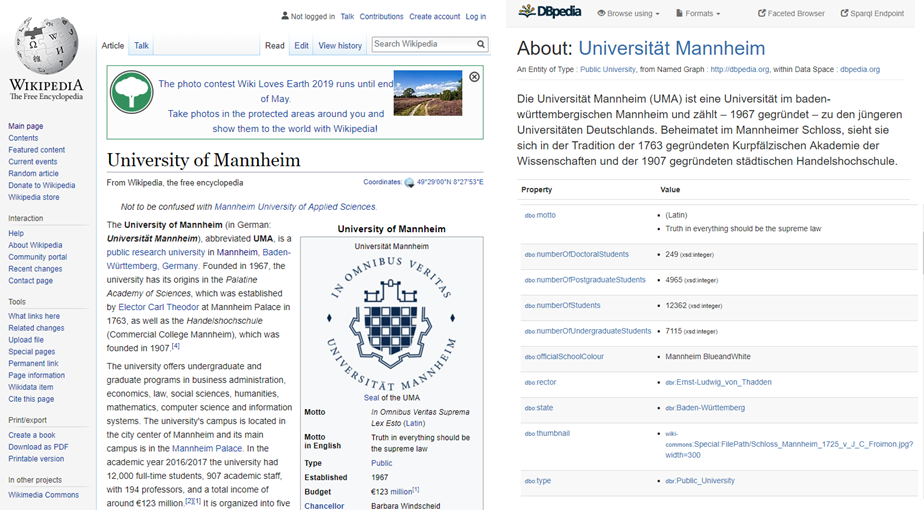

# DBpedia (structured wikipedia)

- every information is stored in triple of the form (subject, predicate, object)
- every thing/concept has its own identifier (URI)
- e.g. < http://dbpedia.org/resource/Mannheim > <.../populationTotal> 311142.
- SPARQL is a query language similar to SQL
```
SELECT ?s
WHERE{
    ?s dbo:populationTotal 311142.
}
```
- queries can be tried out here: https://dbpedia.org/sparql

## Toy example dataset with some cities

In [17]:
city_dataset = pd.DataFrame(data={'city': ['Mannheim', 'Frankfurt', 'Berlin', 'Stuttgart', 'Bremen', 'Bochum', 'Dortmund'], 'target': ['no', 'yes', 'yes', 'no', 'no', 'no', 'no']})
city_dataset

city target
0   Mannheim     no
1  Frankfurt    yes
2     Berlin    yes
3  Stuttgart     no
4     Bremen     no
5     Bochum     no
6   Dortmund     no

### Retrive more information about the cities with DBpedia

In [18]:
import requests
for i, row in city_dataset.iterrows():    
    query = """SELECT *
    WHERE {{
        ?s  rdfs:label "{}"@en;
            geo:lat ?lat;
            geo:long ?long;
            dbo:populationTotal ?population.
    }}
    LIMIT 1""".format(row['city'])
    #print(query)

    r = requests.get('http://dbpedia.org/sparql', params={'query': query, 'format': 'application/sparql-results+json'})
    
    bindings = r.json()['results']['bindings']
    if not bindings:
        print('could not find position of {}'.format(row['city']))
        continue
    city_dataset.at[i, 'long'] = bindings[0]['long']['value']
    city_dataset.at[i, 'lat'] = bindings[0]['lat']['value']
    city_dataset.at[i, 'population'] = bindings[0]['population']['value']
city_dataset

city target     long      lat population
0   Mannheim     no  8.46917  49.4889     311142
1  Frankfurt    yes  8.68333  50.1167     731095
2     Berlin    yes  13.3833  52.5167    3610156
3  Stuttgart     no  9.18333  48.7833     623738
4     Bremen     no      8.8  53.0833     548475
5     Bochum     no  7.21583  51.4819     670320
6   Dortmund     no  7.46667  51.5167     575944

# Learn a decision tree to predict the target variable

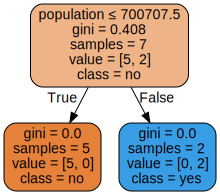

In [19]:
d = city_dataset.drop('target', axis=1).drop('city', axis=1)
p = city_dataset[['target']]
decision_tree.fit(d, p)
dot_data = tree.export_graphviz(decision_tree,
                         feature_names=d.columns,  
                         class_names=unique_labels(p),  
                         filled=True, rounded=True,special_characters=True,out_file=None)  
graphviz.Source(dot_data)

## Word cloud
- from text appearing on the DataFest Website

(-0.5, 399.5, 199.5, -0.5)

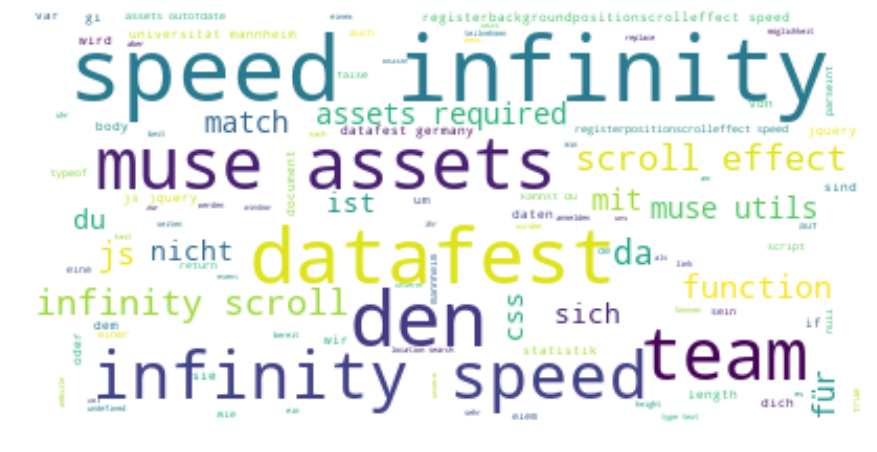

In [20]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud

#get text
response = requests.get('https://hiwissml.github.io/datafest2019/index.html')
soup = BeautifulSoup(response.content, 'lxml')
text = soup.get_text(' ', strip=True).lower()

#create wordcloud:
#conda install -c conda-forge wordcloud
wordcloud = WordCloud(background_color="white", stopwords=['und', 'die', 'der', 'in', 'zu']).generate(text)
plt.figure(figsize = (15,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# That's it - Thank you
jupyter notebook available at http://web.informatik.uni-mannheim.de/shertlin/datafest/
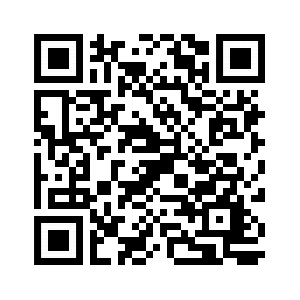